# **Metricas de modelos PREDICTIVOS DISCRETOS**

# **1. PASOS PREVIOS**

## Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modulo de separacion de datos
from sklearn.model_selection import train_test_split
# MOdulo de Matriz de confusion
from sklearn.metrics import confusion_matrix
# Modulo de Arbol de decision
from sklearn.tree import DecisionTreeClassifier
#Modulo de reporte de metricas
from sklearn.metrics import classification_report
# Metricas
from sklearn import metrics
# Curva ROC
from sklearn.metrics import RocCurveDisplay

%matplotlib inline

## Carga de datos

In [2]:
# El objetivo del dataset, es identificacion de sexo en base a las medidas del resto
# sexo = f(peso, altura, pie, hombros, brazos, caderas, ojos)
df = pd.read_csv("ds_persona2_ML.csv")
df.head()

,Peso,Altura,Pie,Hombros,Brazos,Caderas,Ojos,Sexo
0,60,163,37,41,68,95,1,1
1,52,166,37,37,70,87,2,1
2,61,172,39,39,69,91,2,1
3,73,181,43,50,78,101,2,2
4,53,172,39,39,72,89,1,1


# **2. APLICACION DEL MODELO PREDICTIVO**

## Separacion de datos para entrenamiento y test

In [7]:
x = df.drop(['Sexo'], axis = 1)
y = df['Sexo']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

## Entrenamiento con arbo de decision

In [14]:
modelo = DecisionTreeClassifier(criterion='gini', max_depth=5)
modelo.fit(x_train, y_train)
modelo.score(x_test, y_test)

0.9333333333333333

# **3. PREDICCION DEL MODELO**

## Prediccion de datos de test

In [15]:
pred = modelo.predict(x_test)

## Resultados de la prediccion

In [16]:
pred

array([2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 1, 2, 2, 1, 1, 2])

## Resultados de los datos reales

In [17]:
y_test

75    2
96    2
47    1
30    2
81    1
71    2
78    2
11    1
68    2
37    2
27    2
34    1
17    2
90    2
8     1
72    1
80    2
18    2
33    1
48    1
46    1
16    1
6     1
51    1
55    1
73    2
64    2
87    1
97    1
84    2
Name: Sexo, dtype: int64

# **4. CALCULO Y VISUALIZACION DE MATRICAS**

## Obtencion de metricas

In [23]:
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)
Presicion = metrics.precision_score(y_test, pred)
Sensibilidad = metrics.recall_score(y_test, pred)
PuntuacionF1 = metrics.f1_score(y_test, pred)
Reporte = classification_report(y_test, pred)

## Matriz de confusion

In [22]:
print('Matriz de confusion')
print(MatrizConfusion)

Matriz de confusion
[[14  1]
 [ 1 14]]


In [25]:
print('Exactitud     : ', Exactitud)
print('Presicion     : ', Presicion)
print('Sensibilidad  : ', Sensibilidad)
print('Puntuacion F1 : ', PuntuacionF1)

Exactitud     :  0.9333333333333333
Presicion     :  0.9333333333333333
Sensibilidad  :  0.9333333333333333
Puntuacion F1 :  0.9333333333333333


In [26]:
print('Reporte de metricas: ')
print(Reporte)

Reporte de metricas: 
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## Curva ROC

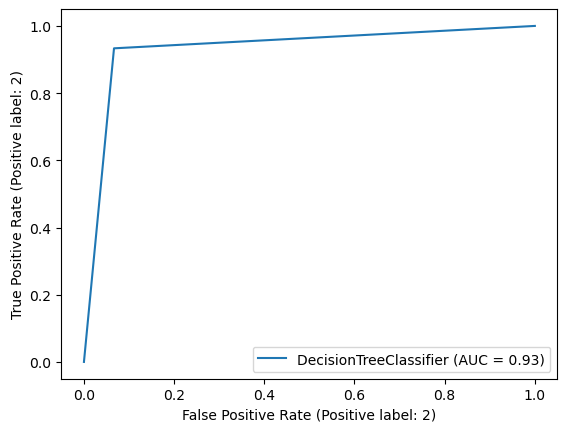

In [27]:
RocCurveDisplay.from_estimator(modelo, x_test, y_test)